In [15]:
'''

Explore the application of k-means clustering in color compression of a color image.
To explore it, read an image having multiple colors where a large number of colors
will be unused, and many of the pixels in the image will have similar or even identical
colors. 
Cluster these several colors into a 16 different clusters and show the
compressed image.

'''

'\n\nExplore the application of k-means clustering in color compression of a color image.\nTo explore it, read an image having multiple colors where a large number of colors\nwill be unused, and many of the pixels in the image will have similar or even identical\ncolors. \nCluster these several colors into a 16 different clusters and show the\ncompressed image.\n\n'

In [16]:
#pip install opencv-python

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
 
def read_image():
    img = cv2.imread('bird_small.png')  
     
    # Convert the image from BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
     
    # Scaling the image so that the values are in the range of 0 to 1
    img = img / 255.0
 
    return img

In [18]:
from skimage import io
# reading the image
filename = 'bird_small.png'
image = io.imread(filename)
 

In [19]:
# preprocessing
rows, cols = image.shape[0], image.shape[1]
image = image.reshape(rows * cols, 3)

In [20]:
from sklearn.cluster import KMeans
# modelling
print('Compressing...')
kMeans = KMeans(n_clusters = 16)
kMeans.fit(image)

Compressing...


/Users/divesh.gandhi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=16)

In [21]:
# getting centers and labels
centers = np.asarray(kMeans.cluster_centers_, dtype=np.uint8)
labels = np.asarray(kMeans.labels_, dtype = np.uint8)
labels = np.reshape(labels, (rows, cols))

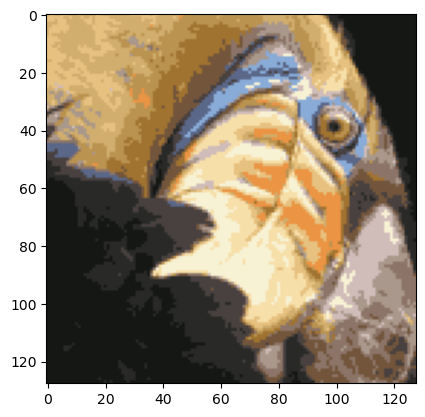

In [25]:
# reconstructing the image
newImage = np.zeros((rows, cols, 3), dtype=np.uint8)
for i in range(rows):
    for j in range(cols):
            # assinging every pixel the rgb color of their label's center
            newImage[i, j, :] = centers[labels[i, j], :]
#io.imsave(filename.split('.')[0] + '-compressed.png', newImage)
plt.imshow(newImage)
plt.show()